Path Integral Result: 0.0018673259528772844
Path with maximum weight (index 708):1.0


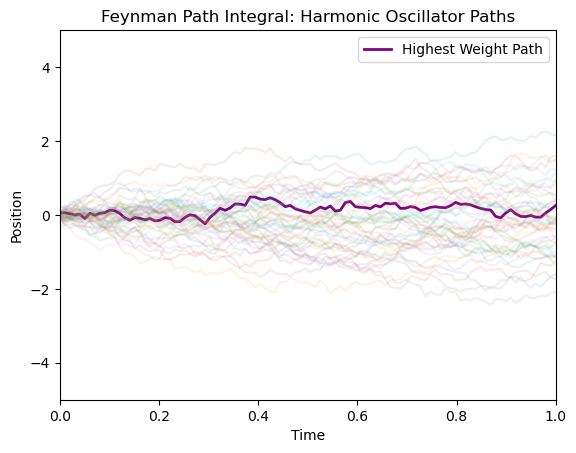

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the harmonic oscillator

m = 1.0 # mass
omega = 1.0 # angular frequency
hbar = 1.0 # reduced Planck constant

# Time parameters
t0, tf = 0.0, 1.0

N = 100 # number of time slices
dt = (tf - t0) / N
time = np.linspace(t0, tf, N)

# Number of paths to simulate
num_paths = 1000
26

# Function to calculate the action for a given path
def action(path):
 kinetic = 0.5 * m * np.sum((np.diff(path) / dt) ** 2) * dt
 potential = 0.5 * m * omega ** 2 * np.sum(path ** 2) * dt
 return kinetic + potential

# Function to generate random paths
def generate_paths(num_paths, N):
    paths = np.zeros((num_paths, N))
    for i in range(num_paths):
        paths[i, :] = np.cumsum(np.random.randn(N)) * np.sqrt(dt)
    return paths

# Generate paths
paths = generate_paths(num_paths, N)

# Calculate actions and weights
actions = np.array([action(path) for path in paths])
weights = np.exp(-actions / hbar)

# Normalize weights for visualization
weights /= np.max(weights)

# Calculate the path integral
path_integral = np.sum(weights) / num_paths
print("Path Integral Result: {}".format(path_integral))
# Find the path with the maximum weight
max_weight_index = np.argmax(weights)
print("Path with maximum weight (index {}):{}".format(max_weight_index,weights[max_weight_index]))
# Visualize the paths
fig, ax = plt.subplots()
ax.set_xlim((t0, tf))
ax.set_ylim((-5, 5))
# Plot the path with the highest weight first for visibility
ax.plot(time, paths[max_weight_index, :], color='purple', linewidth=2,
label='Highest Weight Path', alpha=1.0)
# Plot the remaining paths
for i in range(50):
    if i != max_weight_index:
        ax.plot(time, paths[i, :], alpha=max(0.1, weights[i]))
plt.xlabel('Time')
plt.ylabel('Position')
28
plt.title('Feynman Path Integral: Harmonic Oscillator Paths')
ax.legend()
plt.show()